# Ethylene 09

### With only one power source, using the battery to select when to buy the power

status: optimal
Minimized Cost: $ 534316.2938621055


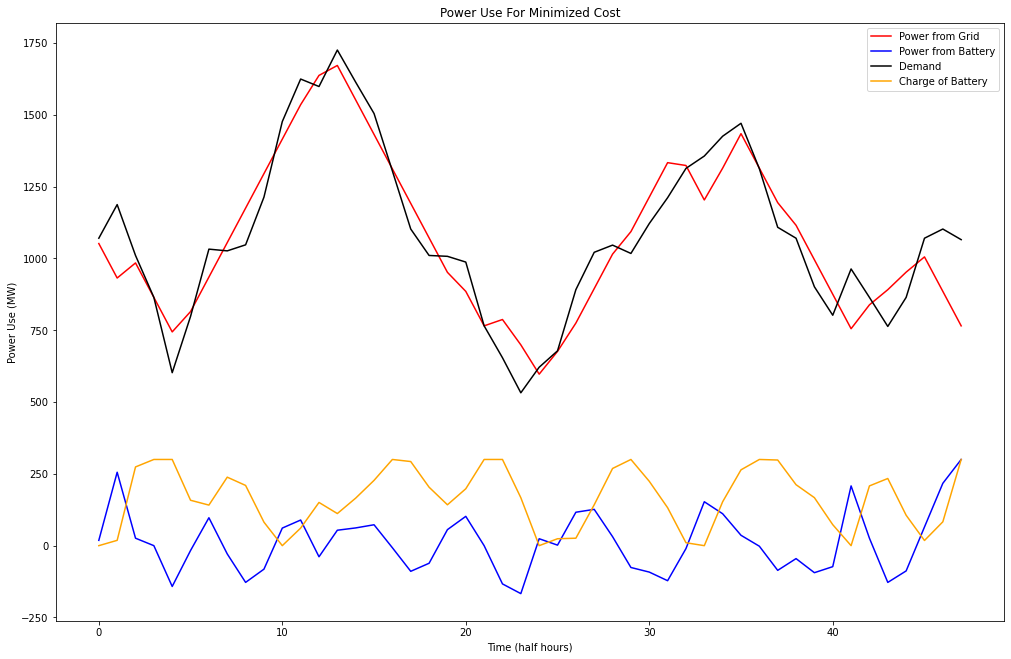

In [3]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)
    
#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
#print("optimal var", P_g_1.value, P_g_2.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Same thing, different prices

status: optimal
Minimized Cost: $ 746978.7185146617


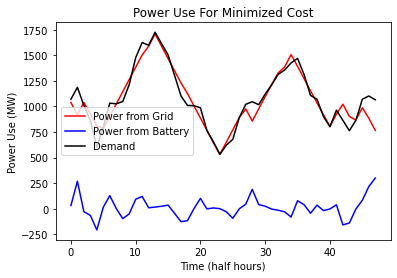

In [98]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Gas"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Gas"])*P_b[n]]
    
#establishing battery charge
E_b = []
E_b = E_b + [0] #charge at start is 0
for n in range (1, t+1):
    E_b = E_b + [E_b[n-1] + P_b[n-1]] #charge + load is battery charge at next time step
    
#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b] # the sources sum to load requirements
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    #battery charge is between 0 and the maximum value
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
#print("optimal var", P_g_1.value, P_g_2.value)

#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') # power
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery'); # battery
plt.plot(range(0,t), P_L, "black", label = 'Demand'); # demand

plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()

### Incorporating Solar

#### AC Output

status: optimal
Minimized Cost: $ 534034.9660680422


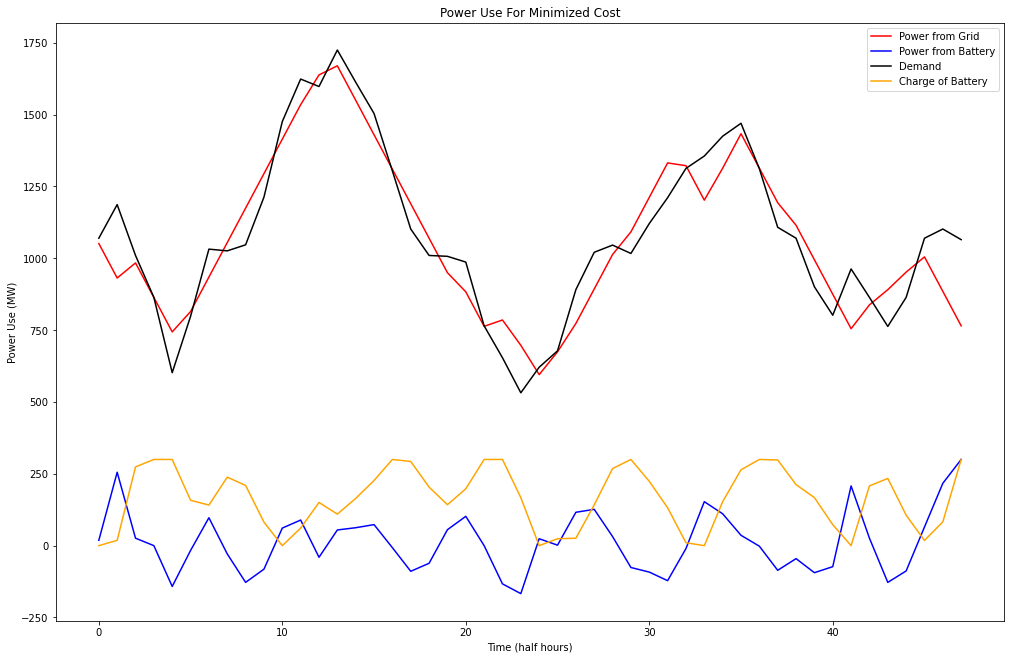

In [4]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "AC MW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### DC Output

status: optimal
Minimized Cost: $ 534022.6879754782


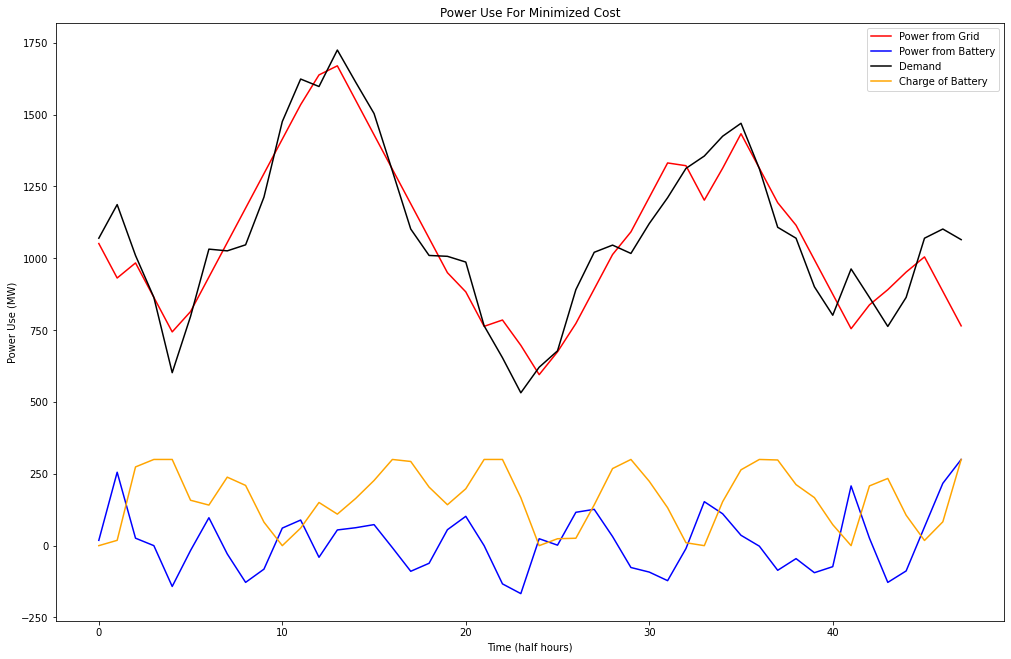

In [5]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "DC MW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Using lower P_L (P_S)

#### AC

status: optimal
Minimized Cost: $ 694.3673740324697


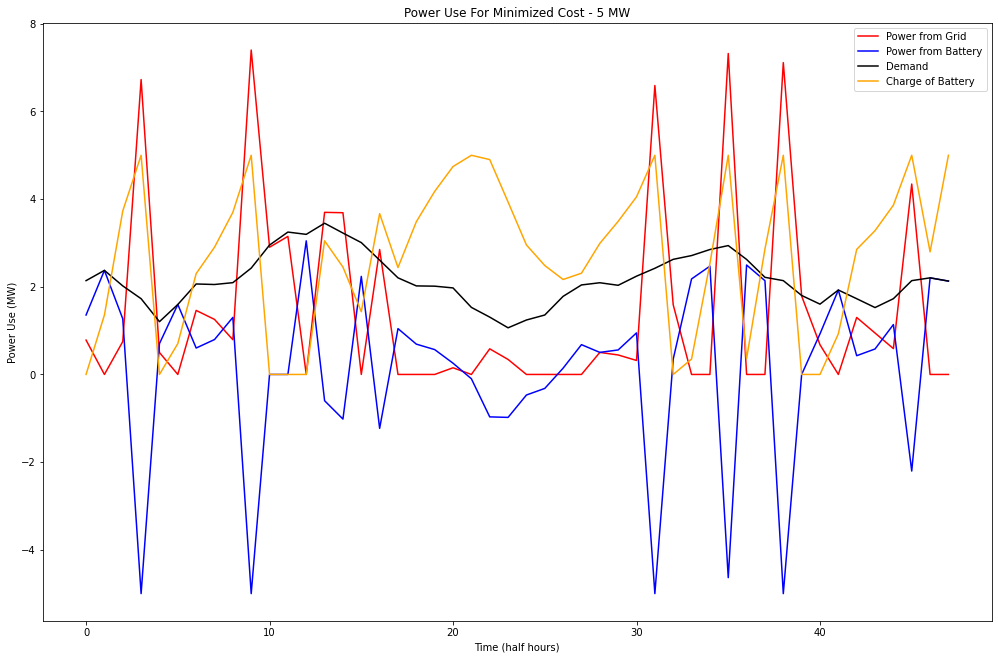

In [7]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_R']]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 5 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "AC MW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost - 5 MW")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### DC

status: optimal
Minimized Cost: $ 411.14868242831704


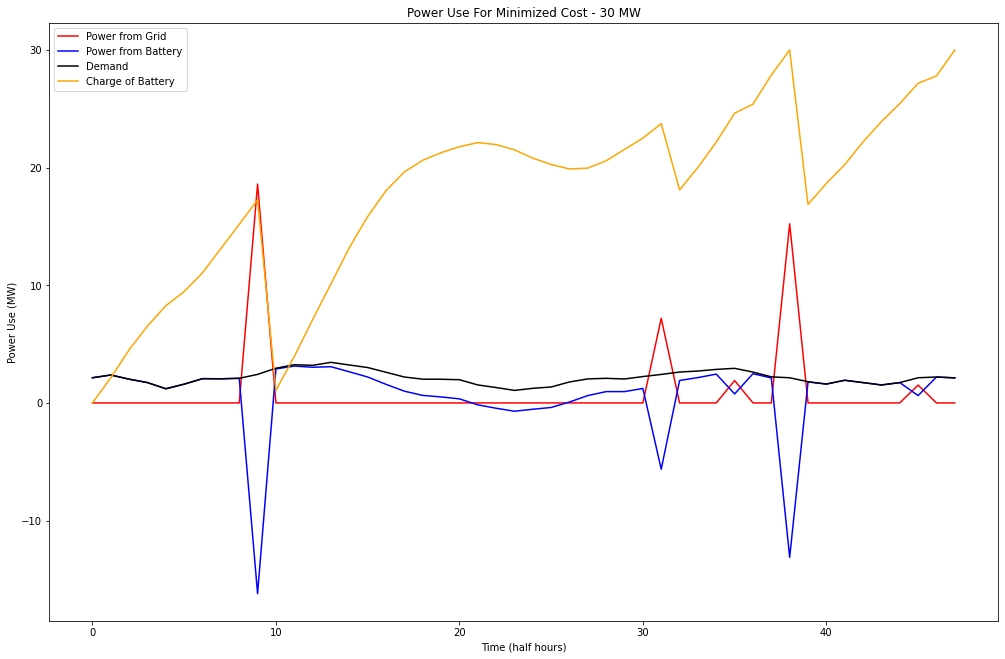

In [9]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_R']]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 30 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "DC MW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost - 30 MW")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)